# XGBoost model for PM2.5 prediction

In [1]:
import pandas as pd
import os
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sklearn


In [ ]:
#make the same name for PM25 column in all sensors csv files.
import pandas as pd
import os

# loop through each file in the directory
#for filename in os.listdir('Data_prep'):
    if filename.endswith('.csv'):
        # read the CSV file
        df = pd.read_csv(f'Data_prep/{filename}', parse_dates=[0])
        
        # change the column name
        new_col_name = 'PM25'
        df = df.rename(columns={df.columns[1]: new_col_name})
        
        # save the file
        df.to_csv(f'Data_prep/{filename}', index=False)

In [21]:
#find the maximum values of PM25 among officila sensors(sensors 01 to 08) for data cleaning
import os
import pandas as pd

# Initialize an empty list to store the maximum values
max_values = []

# Iterate over the range of file numbers 1 to 8
for i in range(1, 9):
    # Construct the file name
    file_name = f"{i:02d}.csv"
    
    # Construct the file path
    file_path = os.path.join('Data_prep/', file_name)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Get the maximum value of the 'PM25' column
    max_value = df['PM25'].max()
    
    # Append the maximum value to the list
    max_values.append(max_value)

# Get the overall maximum value from the list
overall_max = max(max_values)

# Print the overall maximum value
print("Overall maximum value of PM25 column for official sensors:", overall_max)


Overall maximum value of PM25 column for official sensors: 382.1


In [22]:
#Define a data cleaning function for removing negative values and values higher than the maximum values among official sensors
import pandas as pd
import os

# Define function for data cleaning
def clean_data(df, max_values):
    # Drop rows with missing values
    df.dropna(inplace=True)

    # Drop rows with negative values in PM2.5 column
    df = df[df['PM25'] >= 0]
    # Drop values higher than the maximum values of the first eight sensors
    df = df[df['PM25'] <= max_values]

    # Drop duplicate rows
    df.drop_duplicates(inplace=True)

    # Convert DateTime column to datetime format
    df['DateTime'] = pd.to_datetime(df['DateTime'])

    # Set DateTime column as index
    df.set_index('DateTime', inplace=True)

    # Return cleaned DataFrame
    return df

# Define path to the directory containing the csv files
data_dir = 'Data_prep/'

# Define path to the directory to save the cleaned csv files
clean_data_dir = 'Data_prep_cleaned1/'

# Create the directory to save the cleaned csv files, if it does not exist
if not os.path.exists(clean_data_dir):
    os.makedirs(clean_data_dir)

# Loop through csv files in the directory
for file_name in os.listdir(data_dir):
    # Check if file is a csv file
    if file_name.endswith('.csv'):
        # Read csv file into a pandas DataFrame
        df = pd.read_csv(os.path.join(data_dir, file_name))

        # Clean data for all sensors
        df = clean_data(df, overall_max)

        # Save cleaned DataFrame to csv file in the new directory
        cleaned_file_name = os.path.join(clean_data_dir, file_name)
        df.to_csv(cleaned_file_name, index=True)


In [23]:
df = pd.read_csv('Data_prep_cleaned1/01.csv')
df.head()

,DateTime,PM25
0,2021-01-01 00:00:00,73.8
1,2021-01-01 01:00:00,173.3
2,2021-01-01 02:00:00,289.5
3,2021-01-01 03:00:00,162.1
4,2021-01-01 04:00:00,140.2


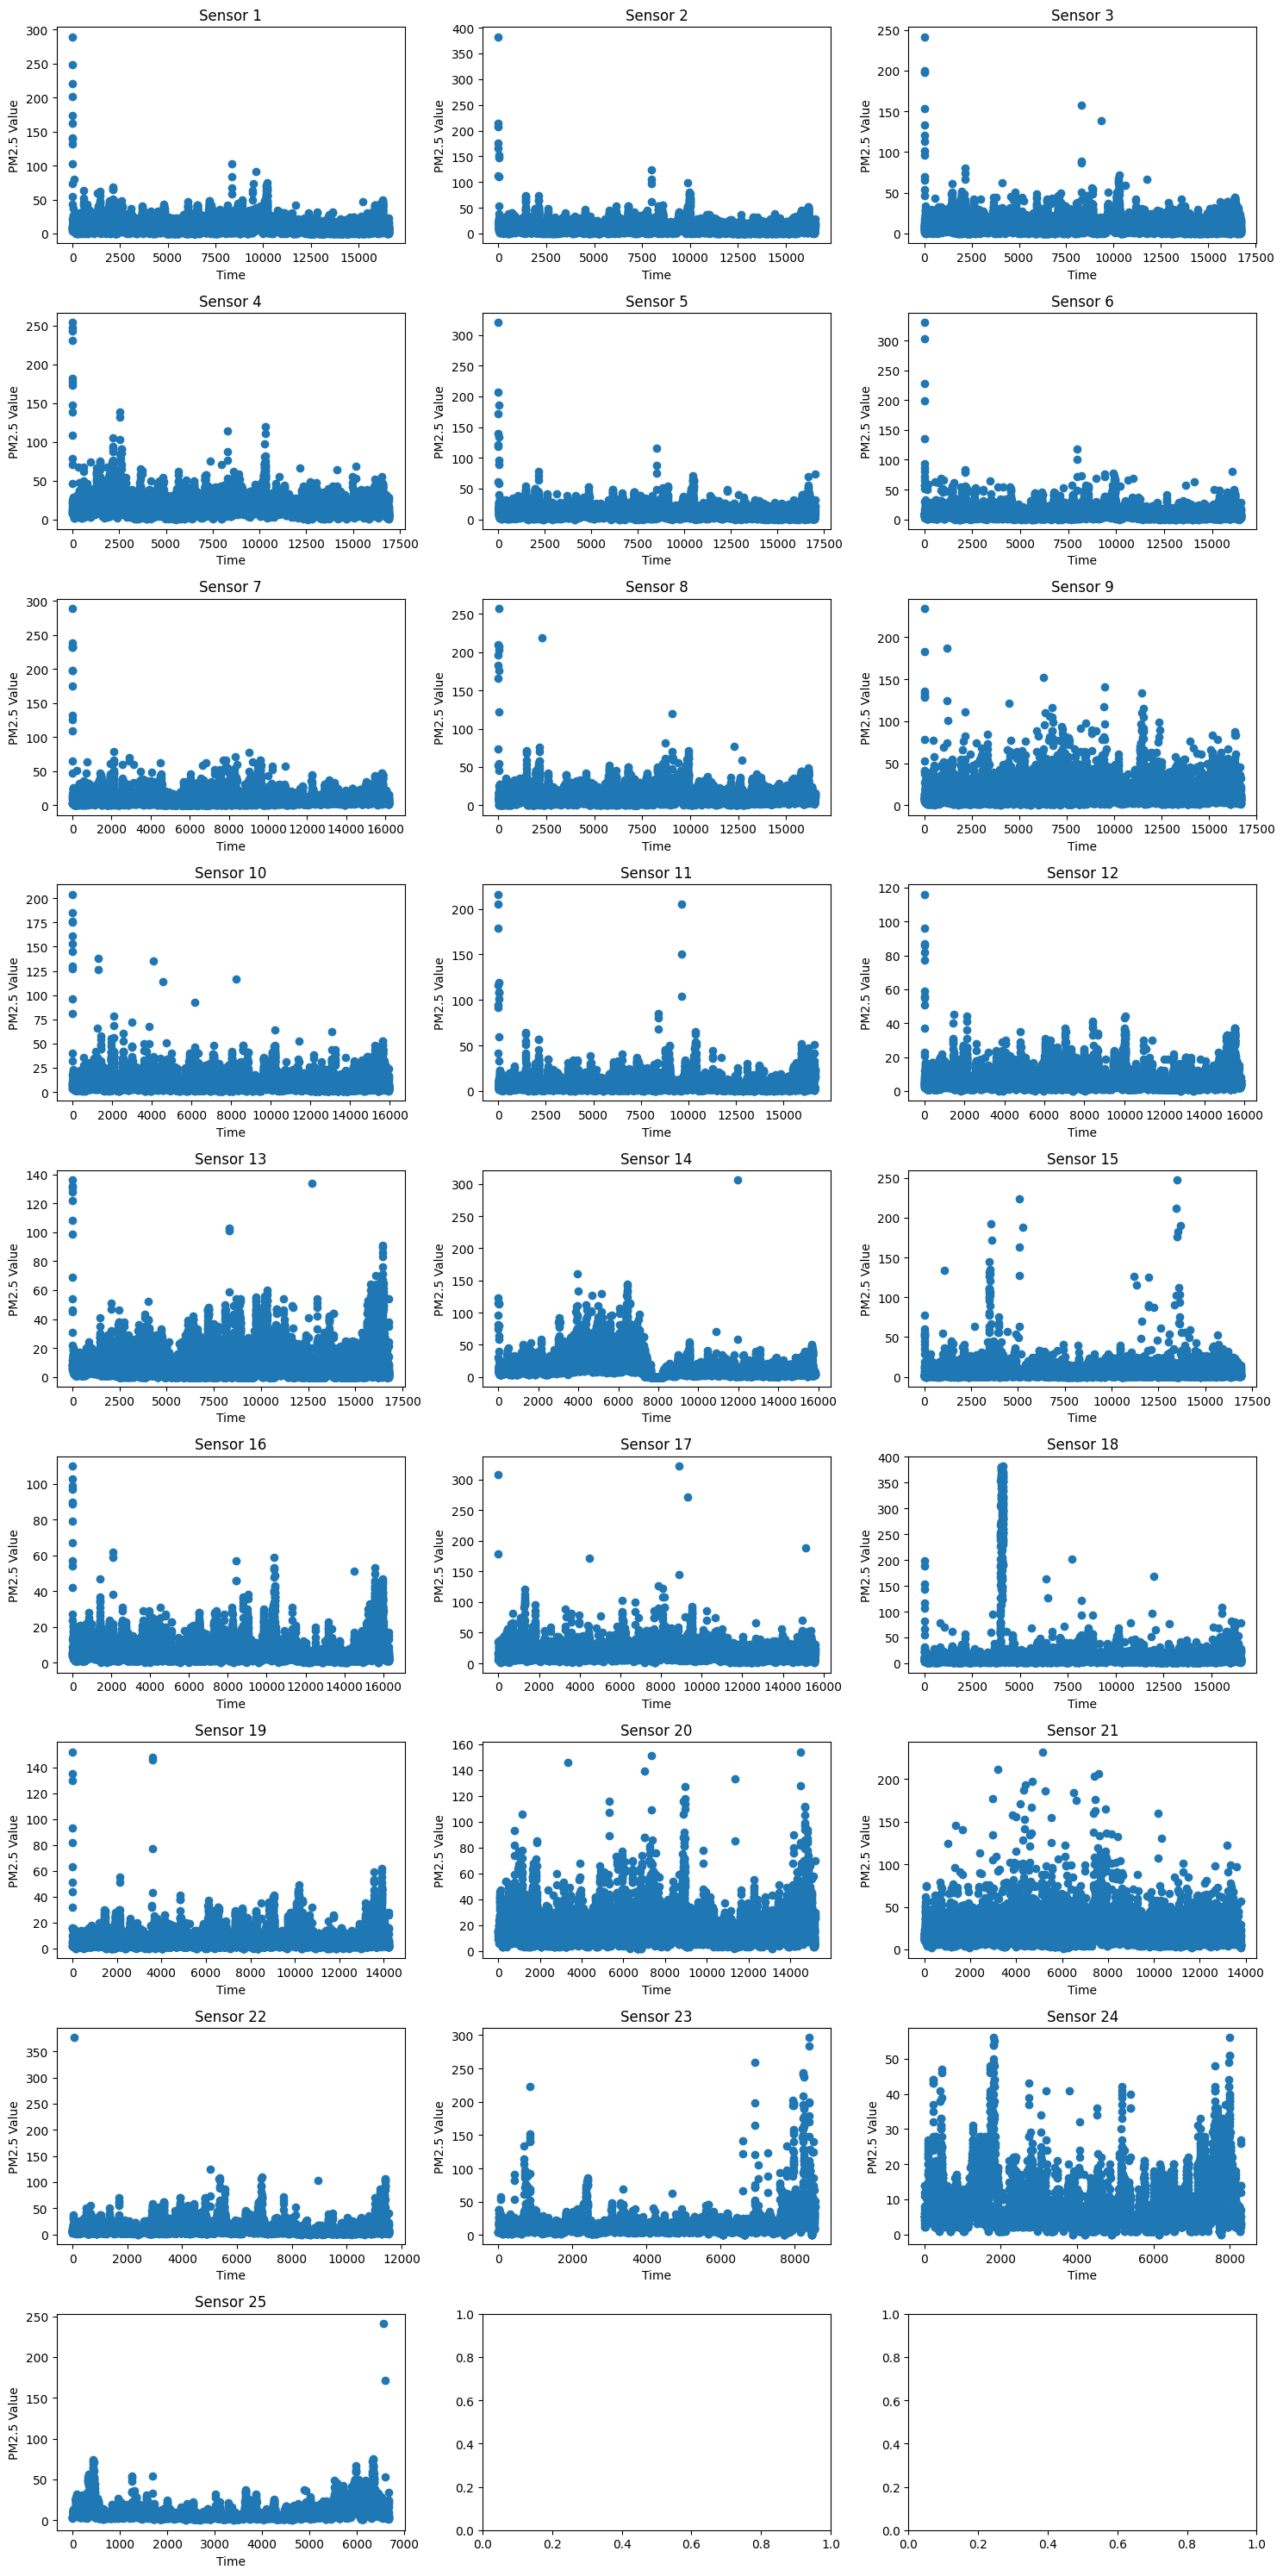

In [24]:
#Checking for outliers using a scatter plot for cleaned dataset
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15,30))
for i, ax in enumerate(axes.flat):
    if i+1 <= 25:
        df = pd.read_csv(f'Data_prep_cleaned1/{i+1:02d}.csv', parse_dates=[0])
        ax.scatter(df.index, df['PM25'])
        ax.set_title(f"Sensor {i+1}")
        ax.set_xlabel("Time")
        ax.set_ylabel("PM2.5 Value")
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

In [2]:
df = pd.read_csv('Meteorological_Schiphol.csv')


df = df.apply(lambda x: x.str.rstrip(','))

#df.to_csv('Meteorological_Schiphol_updated1.csv', index=False)

df.head()

,DateTime,wind_dir,wind_sp,Temperature,precipitation,humidity
0,01/01/2021 00:00,220,20,-13,0,98
1,01/01/2021 01:00,200,30,-18,0,98
2,01/01/2021 02:00,210,20,-12,0,98
3,01/01/2021 03:00,220,30,-6,0,98
4,01/01/2021 04:00,210,20,2,0,98


In [15]:
Meteorological_Schiphol_updated = pd.read_csv('Meteorological_Schiphol_updated1.csv')
Meteorological_Schiphol_updated.head()
Meteorological_Schiphol_updated['humidity'].dtype


dtype('int64')

In [16]:
Meteorological_Schiphol_updated = pd.read_csv('Meteorological_Schiphol_updated1.csv')
date_range = pd.read_csv('date_range.csv')
Meteorological_Schiphol_updated = Meteorological_Schiphol_updated.drop(columns=['DateTime'])
Meteorological_Schiphol_updated['DateTime'] = date_range['DateTime']
# Remove the extra space in the column name
Meteorological_Schiphol_updated.rename(columns={'precipitation ': 'precipitation'}, inplace=True)
#Meteorological_Schiphol_updated = Meteorological_Schiphol_updated.reindex(columns=['DateTime', 'wind_dir', 'wind_sp', 'Temperature', 'precipitation', 'humidity'])
#change the format of precipitation column to numeric
#Meteorological_Schiphol_updated['precipitation'] = pd.to_numeric(Meteorological_Schiphol_updated['precipitation'], errors='coerce')
Meteorological_Schiphol_updated.to_csv('Meteorological_Schiphol_updated_modified.csv', index=False)


Meteorological_Schiphol_updated.head()

,wind_dir,wind_sp,Temperature,precipitation,humidity,DateTime
0,220,20,-13,0,98,2021-01-01 00:00:00
1,200,30,-18,0,98,2021-01-01 01:00:00
2,210,20,-12,0,98,2021-01-01 02:00:00
3,220,30,-6,0,98,2021-01-01 03:00:00
4,210,20,2,0,98,2021-01-01 04:00:00


In [4]:
#Combining sensors file into single file
import pandas as pd

start_date = '2021-01-01 00:00:00'
end_date = '2022-12-31 23:00:00'

date_range = pd.date_range(start=start_date, end=end_date, freq='H')
df = pd.DataFrame({'DateTime': date_range})

df.to_csv('date_range1.csv', index=False)


In [5]:
import os
import pandas as pd

dir_path = 'Data_prep_cleaned1'
files = os.listdir(dir_path)
dfs = []
for file in files:
    if file.endswith('.csv'):
        sensor = file.split('.')[0]  # extract sensor name
        df = pd.read_csv(os.path.join(dir_path, file))
        df['sensor'] = sensor
        df = df[['sensor', 'DateTime', 'PM25']]  # reorder columns
        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)
combined_df = combined_df.sort_values(['sensor', 'DateTime']).reset_index(drop=True)



In [6]:
combined_df.head()

,sensor,DateTime,PM25
0,01,2021-01-01 00:00:00,73.8
1,01,2021-01-01 01:00:00,173.3
2,01,2021-01-01 02:00:00,289.5
3,01,2021-01-01 03:00:00,162.1
4,01,2021-01-01 04:00:00,140.2


In [7]:
print(combined_df.shape[0])

374159


In [8]:
# Read Meteorological_Schiphol_updated.csv
meteorological = pd.read_csv('Meteorological_Schiphol_updated_modified.csv')

# Merge meteorological dataframe to combined_df
combined_df = pd.merge(combined_df, meteorological, on='DateTime', how='left')


combined_df.head()

combined_df.to_csv('Dataset.csv', index=False)

In [9]:
combined_df.head()

,sensor,DateTime,PM25,wind_dir,wind_sp,temperature,precipitation,humidity,cloudiness,pressure
0,01,2021-01-01 00:00:00,73.8,220.0,20.0,-13.0,0.0,98.0,3.0,10057
1,01,2021-01-01 01:00:00,173.3,200.0,30.0,-18.0,0.0,98.0,5.0,10060
2,01,2021-01-01 02:00:00,289.5,210.0,20.0,-12.0,0.0,98.0,2.0,10062
3,01,2021-01-01 03:00:00,162.1,220.0,30.0,-6.0,0.0,98.0,8.0,10060
4,01,2021-01-01 04:00:00,140.2,210.0,20.0,2.0,0.0,98.0,8.0,10061


In [20]:
# Read sensors_lcz.csv
sensors_lcz = pd.read_csv('sensors_lcz_prob.csv')
# Use the zfill() function to add leading zeros to the sensor column
sensors_lcz['sensor'] = sensors_lcz['sensor'].apply(lambda x: str(x).zfill(2))
sensors_lcz.head()

#sensors_lcz.to_csv('sensors_lcz.csv', index=False)

,sensor,lcz,1,2,3,4,5,6,8,9,10,A,B,D,E,F,G
0,01,4,0.13,0.03,0.09,0.26,0.15,0.30,0.03,0.00,0.01,0.00,0.0,0.0,0.0,0,0
1,02,5,0.00,0.40,0.01,0.00,0.59,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0
2,03,2,0.00,0.51,0.20,0.00,0.22,0.07,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0
3,04,9,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.87,0.00,0.08,0.0,0.0,0.0,0,0
4,05,5,0.00,0.23,0.06,0.00,0.70,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0


In [21]:
# add the lcz column from sensors_lcz.csv to Dataset.csv
import pandas as pd

# read Dataset.csv and sensors_lcz.csv
dataset = pd.read_csv('Dataset.csv')
sensors_lcz_prob = pd.read_csv('sensors_lcz_prob.csv')

# perform left join on 'sensor' column
dataset_lcz = pd.merge(dataset, sensors_lcz_prob, on='sensor', how='left')

# save merged dataset as csv
dataset_lcz.to_csv('dataset_lcz_prob.csv', index=False)



### Adding temperature and humidity of citizensensor sciences to the Dataset

In [112]:
df1 = pd.read_csv('citizenscience_sensors/ltd_8802_update.csv')
date_range = pd.read_csv('date_range.csv')
df1 = df1.drop(columns=['DateTime'])
df1['DateTime'] = date_range['DateTime']
df1.head()
df1.to_csv('citizenscience_sensors/ltd_8802_update.csv', index=False)

In [47]:
# Read dataset__lcz.csv
df = pd.read_csv('dataset_lcz_prob.csv')
df.head()

,sensor,DateTime,PM25,wind_dir,wind_sp,temperature,precipitation,humidity,cloudiness,pressure,...,6,8,9,10,A,B,D,E,F,G
0,1,2021-01-01 00:00:00,73.8,220.0,20.0,-13.0,0.0,98.0,3.0,10057,...,0.3,0.03,0.0,0.01,0.0,0.0,0.0,0.0,0,0
1,1,2021-01-01 01:00:00,173.3,200.0,30.0,-18.0,0.0,98.0,5.0,10060,...,0.3,0.03,0.0,0.01,0.0,0.0,0.0,0.0,0,0
2,1,2021-01-01 02:00:00,289.5,210.0,20.0,-12.0,0.0,98.0,2.0,10062,...,0.3,0.03,0.0,0.01,0.0,0.0,0.0,0.0,0,0
3,1,2021-01-01 03:00:00,162.1,220.0,30.0,-6.0,0.0,98.0,8.0,10060,...,0.3,0.03,0.0,0.01,0.0,0.0,0.0,0.0,0,0
4,1,2021-01-01 04:00:00,140.2,210.0,20.0,2.0,0.0,98.0,8.0,10061,...,0.3,0.03,0.0,0.01,0.0,0.0,0.0,0.0,0,0


In [114]:
df13 = pd.read_csv('citizenscience_sensors/Schiphol_update.csv')
df13.head()


,temperature1,humidity1,DateTime
0,-13,98,2021-01-01 00:00:00
1,-18,98,2021-01-01 01:00:00
2,-12,98,2021-01-01 02:00:00
3,-6,98,2021-01-01 03:00:00
4,2,98,2021-01-01 04:00:00


In [109]:
missing_values = df13.isnull().sum()
print(missing_values)

temperature1    0
humidity1       0
DateTime        0
dtype: int64


In [115]:
import pandas as pd

# Read the main dataset file
df = pd.read_csv('dataset_lcz_prob.csv')

# Create an empty DataFrame to store the merged data
merged_df = pd.DataFrame()

# List of LTD files
ltd_files = [
    'citizenscience_sensors/ltd_22266_update.csv',
    'citizenscience_sensors/ltd_32517_update.csv',
    'citizenscience_sensors/ltd_33268_update.csv',
    'citizenscience_sensors/ltd_8802_update.csv',
    'citizenscience_sensors/Schiphol_update.csv'
]

# Select the desired sensor values for each LTD file
sensor_values = {
    'citizenscience_sensors/ltd_22266_update.csv': [5, 9, 13, 20, 21, 23],
    'citizenscience_sensors/ltd_32517_update.csv': [12, 14, 16],
    'citizenscience_sensors/ltd_33268_update.csv': [18, 19, 24, 25],
    'citizenscience_sensors/ltd_8802_update.csv': [1, 2, 3, 4, 8, 10, 11, 15, 17, 22],
    'citizenscience_sensors/Schiphol_update.csv': [6, 7]
}

# Iterate over the LTD files
for ltd_file in ltd_files:
    # Read the LTD file
    ltd_data = pd.read_csv(ltd_file)
    
    # Get the desired sensor values for the current LTD file
    desired_sensors = sensor_values[ltd_file]
    
    # Filter the rows in the main dataset based on DateTime and sensor values
    filtered_df = df[df['DateTime'].isin(ltd_data['DateTime']) & df['sensor'].isin(desired_sensors)]
    
    # Merge the temperature and humidity columns from the current LTD file to the main dataset
    merged_data = pd.merge(filtered_df, ltd_data[['DateTime', 'temperature1', 'humidity1']], on='DateTime', how='left')
    
    # Append the merged data to the overall merged_df
    merged_df = merged_df.append(merged_data, ignore_index=True)

print(merged_df)
# Write the merged data to a new CSV file
merged_df.to_csv('merged_data.csv', index=False)


/tmp/ipykernel_283/621067015.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(merged_data, ignore_index=True)
/tmp/ipykernel_283/621067015.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(merged_data, ignore_index=True)
/tmp/ipykernel_283/621067015.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(merged_data, ignore_index=True)
/tmp/ipykernel_283/621067015.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(merged_data, ignore_index=True)
/tmp/ipykernel_283/621067015.py:42: FutureWarning: The frame.append meth

        sensor             DateTime   PM25  wind_dir  wind_sp  temperature  \
0            5  2021-01-01 00:00:00   61.3     220.0     20.0        -13.0   
1            5  2021-01-01 01:00:00  319.9     200.0     30.0        -18.0   
2            5  2021-01-01 02:00:00  121.3     210.0     20.0        -12.0   
3            5  2021-01-01 03:00:00  119.0     220.0     30.0         -6.0   
4            5  2021-01-01 04:00:00  139.1     210.0     20.0          2.0   
...        ...                  ...    ...       ...      ...          ...   
374154       7  2022-12-31 19:00:00   10.8     210.0    120.0        144.0   
374155       7  2022-12-31 20:00:00   11.1     210.0    110.0        145.0   
374156       7  2022-12-31 21:00:00   13.0     210.0    110.0        145.0   
374157       7  2022-12-31 22:00:00   15.1     210.0    100.0        139.0   
374158       7  2022-12-31 23:00:00   16.0     210.0    110.0        140.0   

        precipitation  humidity  cloudiness  pressure  ...    9

In [32]:
# add the traffic column from sensors_traffic.csv to dataset_lcz_prob_new.csv

# read Dataset.csv and sensors_traffic.csv
dataset = pd.read_csv('dataset_lcz_prob_new.csv')
sensors_traffic = pd.read_csv('sensors_traffic.csv')

# perform left join on 'sensor' column
dataset_traffic = pd.merge(dataset, sensors_traffic, on='sensor', how='left')

dataset_traffic.head()
# save merged dataset as csv
dataset_traffic.to_csv('dataset.csv', index=False)



## Working on prepared Dataset

In [33]:
# Read dataset__lcz.csv
df = pd.read_csv('dataset.csv')
df.head()

,sensor,DateTime,PM25,wind_dir,wind_sp,temperature,precipitation,humidity,cloudiness,pressure,...,8,9,10,A,B,D,E,F,G,traffic
0,5,01/01/2021 00:00,61.3,220,20,-13,0,98,3,10057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,96.3
1,5,01/01/2021 01:00,319.9,200,30,-18,0,98,5,10060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,96.3
2,5,01/01/2021 02:00,121.3,210,20,-12,0,98,2,10062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,96.3
3,5,01/01/2021 03:00,119.0,220,30,-6,0,98,8,10060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,96.3
4,5,01/01/2021 04:00,139.1,210,20,2,0,98,8,10061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,96.3


In [34]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

sensor           0
DateTime         0
PM25             0
wind_dir         0
wind_sp          0
temperature      0
precipitation    0
humidity         0
cloudiness       0
pressure         0
temperature1     0
humidity1        0
lcz              0
1                0
2                0
3                0
4                0
5                0
6                0
8                0
9                0
10               0
A                0
B                0
D                0
E                0
F                0
G                0
traffic          0
dtype: int64


In [35]:
# Check for NaN values
nan_values = df.isna().sum()
print(nan_values)


sensor           0
DateTime         0
PM25             0
wind_dir         0
wind_sp          0
temperature      0
precipitation    0
humidity         0
cloudiness       0
pressure         0
temperature1     0
humidity1        0
lcz              0
1                0
2                0
3                0
4                0
5                0
6                0
8                0
9                0
10               0
A                0
B                0
D                0
E                0
F                0
G                0
traffic          0
dtype: int64


In [36]:
#look at the statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sensor,374159.0,11.960346,6.778468,1.0,6.0,12.00,18.00,25.00
PM25,374159.0,10.806519,11.894661,0.0,4.0,8.00,13.70,382.10
wind_dir,374159.0,195.193193,123.239850,0.0,110.0,200.00,270.00,990.00
wind_sp,374159.0,46.217250,26.820084,0.0,30.0,40.00,60.00,230.00
temperature,374159.0,113.115542,64.529592,-97.0,65.0,111.00,161.00,354.00
precipitation,374159.0,0.864215,5.458657,-1.0,0.0,0.00,0.00,265.00
humidity,374159.0,78.558848,14.674142,22.0,69.0,82.00,90.00,100.00
cloudiness,374159.0,6.020291,3.102774,0.0,4.0,8.00,8.00,9.00
pressure,374159.0,10164.390877,99.804980,9797.0,10103.0,10172.00,10233.00,10455.00
temperature1,374159.0,138.165539,68.068193,-97.0,90.0,140.00,190.00,420.00


Text(0, 0.5, 'Wind Velocity [m/s]')

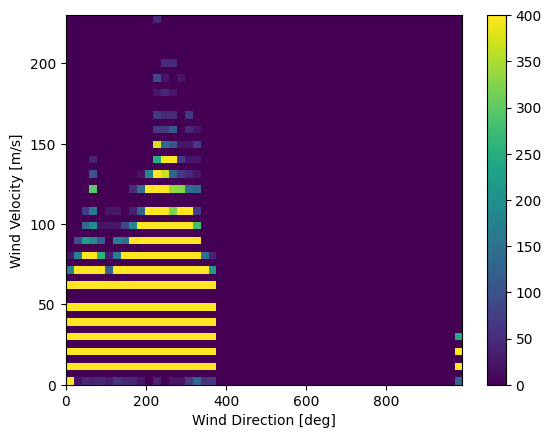

In [37]:
#the distribution of wind data
plt.hist2d(df['wind_dir'], df['wind_sp'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [38]:
#Calculation maximum daily values of wind speed in a new column
# Convert 'DateTime' column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Create a new column 'date' from 'DateTime' column
df['date'] = df['DateTime'].dt.date

# Group the data by 'date' and find the maximum value of 'wind_sp' for each group
ws_max = df.groupby('date')['wind_sp'].max().reset_index()

# Merge the result back to the original dataframe on 'date' column
df = pd.merge(df, ws_max, on='date', suffixes=('', '_max'))

df.head()

,sensor,DateTime,PM25,wind_dir,wind_sp,temperature,precipitation,humidity,cloudiness,pressure,...,10,A,B,D,E,F,G,traffic,date,wind_sp_max
0,5,2021-01-01 00:00:00,61.3,220,20,-13,0,98,3,10057,...,0.0,0.0,0.0,0.0,0.0,0,0,96.3,2021-01-01,30
1,5,2021-01-01 01:00:00,319.9,200,30,-18,0,98,5,10060,...,0.0,0.0,0.0,0.0,0.0,0,0,96.3,2021-01-01,30
2,5,2021-01-01 02:00:00,121.3,210,20,-12,0,98,2,10062,...,0.0,0.0,0.0,0.0,0.0,0,0,96.3,2021-01-01,30
3,5,2021-01-01 03:00:00,119.0,220,30,-6,0,98,8,10060,...,0.0,0.0,0.0,0.0,0.0,0,0,96.3,2021-01-01,30
4,5,2021-01-01 04:00:00,139.1,210,20,2,0,98,8,10061,...,0.0,0.0,0.0,0.0,0.0,0,0,96.3,2021-01-01,30


In [39]:
#convert the wind direction and velocity columns to a wind vector
wind_sp = df.pop('wind_sp')
wind_sp_max = df.pop('wind_sp_max')

# Convert to radians.
wd_rad = df.pop('wind_dir')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wind_sp*np.cos(wd_rad)
df['Wy'] = wind_sp*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = wind_sp_max*np.cos(wd_rad)
df['max Wy'] = wind_sp_max*np.sin(wd_rad)

(-176.19022191736494,
 129.90381056766574,
 -196.9615506024416,
 121.2435565298214)

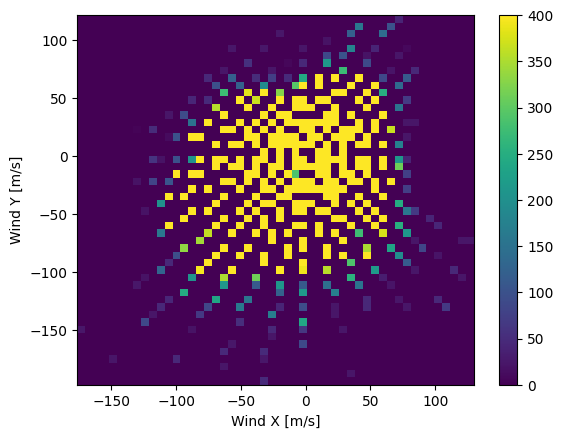

In [40]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [41]:
df.head()

,sensor,DateTime,PM25,temperature,precipitation,humidity,cloudiness,pressure,temperature1,humidity1,...,D,E,F,G,traffic,date,Wx,Wy,max Wx,max Wy
0,5,2021-01-01 00:00:00,61.3,-13,0,98,3,10057,10,91,...,0.0,0.0,0,0,96.3,2021-01-01,-15.320889,-12.855752,-22.981333,-19.283628
1,5,2021-01-01 01:00:00,319.9,-18,0,98,5,10060,10,91,...,0.0,0.0,0,0,96.3,2021-01-01,-28.190779,-10.260604,-28.190779,-10.260604
2,5,2021-01-01 02:00:00,121.3,-12,0,98,2,10062,0,91,...,0.0,0.0,0,0,96.3,2021-01-01,-17.320508,-10.000000,-25.980762,-15.000000
3,5,2021-01-01 03:00:00,119.0,-6,0,98,8,10060,0,91,...,0.0,0.0,0,0,96.3,2021-01-01,-22.981333,-19.283628,-22.981333,-19.283628
4,5,2021-01-01 04:00:00,139.1,2,0,98,8,10061,0,91,...,0.0,0.0,0,0,96.3,2021-01-01,-17.320508,-10.000000,-25.980762,-15.000000


In [42]:
#converting DateTime to seconds
# Convert the date-time column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Convert the datetime values to seconds
df['timestamp_s'] = df['DateTime'].map(pd.Timestamp.timestamp)

In [43]:
df.head()

,sensor,DateTime,PM25,temperature,precipitation,humidity,cloudiness,pressure,temperature1,humidity1,...,E,F,G,traffic,date,Wx,Wy,max Wx,max Wy,timestamp_s
0,5,2021-01-01 00:00:00,61.3,-13,0,98,3,10057,10,91,...,0.0,0,0,96.3,2021-01-01,-15.320889,-12.855752,-22.981333,-19.283628,1.609459e+09
1,5,2021-01-01 01:00:00,319.9,-18,0,98,5,10060,10,91,...,0.0,0,0,96.3,2021-01-01,-28.190779,-10.260604,-28.190779,-10.260604,1.609463e+09
2,5,2021-01-01 02:00:00,121.3,-12,0,98,2,10062,0,91,...,0.0,0,0,96.3,2021-01-01,-17.320508,-10.000000,-25.980762,-15.000000,1.609466e+09
3,5,2021-01-01 03:00:00,119.0,-6,0,98,8,10060,0,91,...,0.0,0,0,96.3,2021-01-01,-22.981333,-19.283628,-22.981333,-19.283628,1.609470e+09
4,5,2021-01-01 04:00:00,139.1,2,0,98,8,10061,0,91,...,0.0,0,0,96.3,2021-01-01,-17.320508,-10.000000,-25.980762,-15.000000,1.609474e+09


In [44]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / day))
df['Day cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / day))
df['Year sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / year))
df['Year cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / year))


In [45]:
df.head()

,sensor,DateTime,PM25,temperature,precipitation,humidity,cloudiness,pressure,temperature1,humidity1,...,date,Wx,Wy,max Wx,max Wy,timestamp_s,Day sin,Day cos,Year sin,Year cos
0,5,2021-01-01 00:00:00,61.3,-13,0,98,3,10057,10,91,...,2021-01-01,-15.320889,-12.855752,-22.981333,-19.283628,1.609459e+09,-6.012051e-12,1.000000,0.010881,0.999941
1,5,2021-01-01 01:00:00,319.9,-18,0,98,5,10060,10,91,...,2021-01-01,-28.190779,-10.260604,-28.190779,-10.260604,1.609463e+09,2.588190e-01,0.965926,0.011597,0.999933
2,5,2021-01-01 02:00:00,121.3,-12,0,98,2,10062,0,91,...,2021-01-01,-17.320508,-10.000000,-25.980762,-15.000000,1.609466e+09,5.000000e-01,0.866025,0.012314,0.999924
3,5,2021-01-01 03:00:00,119.0,-6,0,98,8,10060,0,91,...,2021-01-01,-22.981333,-19.283628,-22.981333,-19.283628,1.609470e+09,7.071068e-01,0.707107,0.013031,0.999915
4,5,2021-01-01 04:00:00,139.1,2,0,98,8,10061,0,91,...,2021-01-01,-17.320508,-10.000000,-25.980762,-15.000000,1.609474e+09,8.660254e-01,0.500000,0.013747,0.999905


Text(0.5, 1.0, 'Time of day signal')

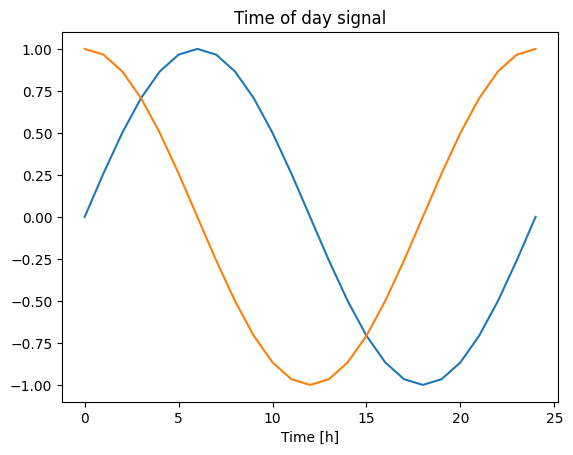

In [46]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

2023-06-08 17:01:07.974120: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


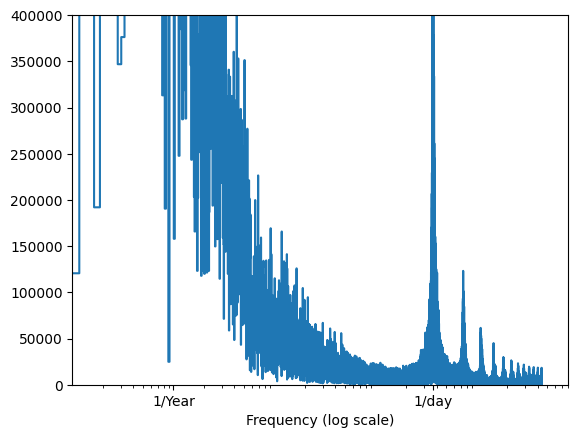

In [48]:
fft = tf.signal.rfft(df['temperature'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['temperature'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [49]:
df.head()

,sensor,DateTime,PM25,temperature,precipitation,humidity,cloudiness,pressure,temperature1,humidity1,...,date,Wx,Wy,max Wx,max Wy,timestamp_s,Day sin,Day cos,Year sin,Year cos
0,5,2021-01-01 00:00:00,61.3,-13,0,98,3,10057,10,91,...,2021-01-01,-15.320889,-12.855752,-22.981333,-19.283628,1.609459e+09,-6.012051e-12,1.000000,0.010881,0.999941
1,5,2021-01-01 01:00:00,319.9,-18,0,98,5,10060,10,91,...,2021-01-01,-28.190779,-10.260604,-28.190779,-10.260604,1.609463e+09,2.588190e-01,0.965926,0.011597,0.999933
2,5,2021-01-01 02:00:00,121.3,-12,0,98,2,10062,0,91,...,2021-01-01,-17.320508,-10.000000,-25.980762,-15.000000,1.609466e+09,5.000000e-01,0.866025,0.012314,0.999924
3,5,2021-01-01 03:00:00,119.0,-6,0,98,8,10060,0,91,...,2021-01-01,-22.981333,-19.283628,-22.981333,-19.283628,1.609470e+09,7.071068e-01,0.707107,0.013031,0.999915
4,5,2021-01-01 04:00:00,139.1,2,0,98,8,10061,0,91,...,2021-01-01,-17.320508,-10.000000,-25.980762,-15.000000,1.609474e+09,8.660254e-01,0.500000,0.013747,0.999905
